# QuickGuide for Text analysis
[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install Colab selenium & crome driver

In [5]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn
!pip install -U mkt-retv

## Env 세팅

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pathlib import Path
import pandas as pd
# from google.colab import files
from market_research.analysis import SentiGPT
from market_research.analysis import TextAnalysis

## 준비

### 분석 폴더
- `input`에 파일을 넣어주세요.

## Text 분석

### SONY group conferrence call QnA 2019~2023

In [11]:
tas = TextAnalysis()

In [12]:
files_path = tas.read_files_from_inputpath(docs_type="pdf")
files_path # SONY group earing call QnA 2019~2023

[WindowsPath('input/19q1_qa.pdf'),
 WindowsPath('input/19q2_qa.pdf'),
 WindowsPath('input/19q3_qa.pdf'),
 WindowsPath('input/19q4_qa.pdf'),
 WindowsPath('input/20q1_qa.pdf'),
 WindowsPath('input/20q2_qa.pdf'),
 WindowsPath('input/20q3_qa.pdf'),
 WindowsPath('input/20q4_qa.pdf'),
 WindowsPath('input/21q1_qa.pdf'),
 WindowsPath('input/21q2_qa.pdf'),
 WindowsPath('input/21q3_qa.pdf'),
 WindowsPath('input/21q4_qa.pdf'),
 WindowsPath('input/22q1_qa.pdf'),
 WindowsPath('input/22q2_qa.pdf'),
 WindowsPath('input/22q3_qa.pdf'),
 WindowsPath('input/22q4_qa.pdf'),
 WindowsPath('input/23q1_qa.pdf'),
 WindowsPath('input/23q2_qa.pdf')]

In [23]:
cleaning_words = [  #사전 필터링하는 어
    "half","fy2021","fy2020", "month","way", "input","earnings",
    "forecast","please","terms","market","g","ns", "unit","assets",
    "fy2022","levels","q","fy2023","numbers","result","units",
    "factors","costs","ss","q1","part",'segment', 'quarter', 
    'statements', 'business', 'question', 'yen', 'year', 'sony', 'results',
    "end","q2","questioner",
    "session","fy2024",
    # "sale","plan","capacity","growth","demand",
    "outlook","increase","investment",
    "example","rate","flow","time","a2","a1"
]

replacement_mapping = {  #사전에 교체하는 단어
    "games": "game",
    "plans": "plan",
    "sensors": "sensor",
    "changes": "change",
    "risks": "risk",
    "services": "service",
    "margins": "margin",
    "profits": "profit",
    "wafers": "wafer",
    "sizes": "size",
    "customers": "customer",
    "applications": "application",
    "shortages": "shortage",
    "expenses": "expense",
    "sales":"sale",
    "titles":"title",
    "conditions":"condition",
    "prices":"price",
    "investments":"investment",
    "rates":"rate",
    "inventories":"inventory",
    "uncertainties":"uncertainty",
    "cameras":"camera",
    "opportunities":"opportunity",
    "volumes":"volume",
    "costs":"cost",
}


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
31     sale         30
60   profit         16
27  segment         15
25       q1         15
64     cost         15


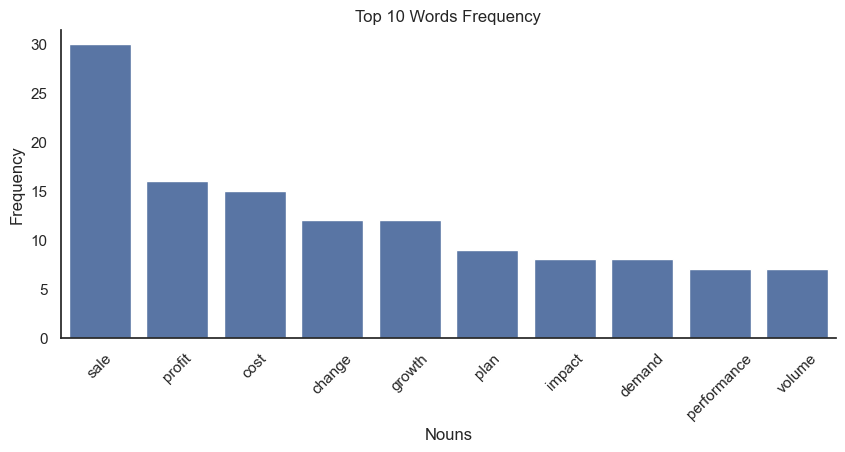

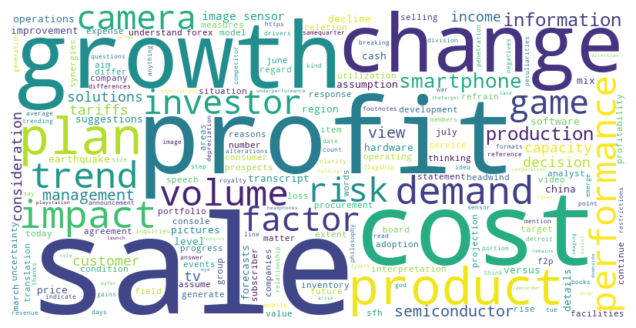


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
        Nouns  Frequency
9   question         23
25      sale         20
28    profit         19
24   segment         15
76      game         15


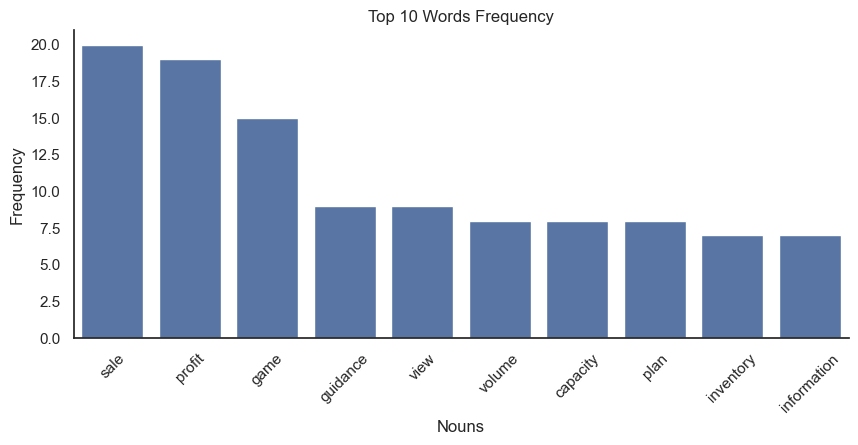

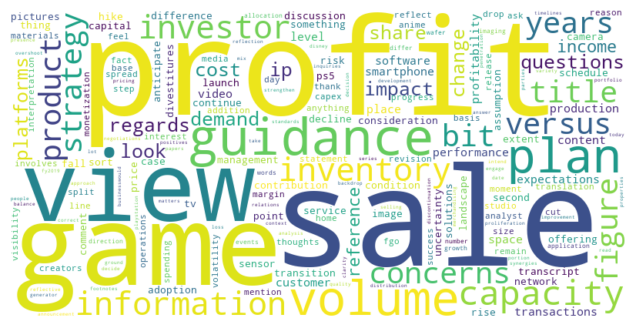


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
13  quarter         29
23  segment         28
71     game         16
22       ss         13
50     plan         13


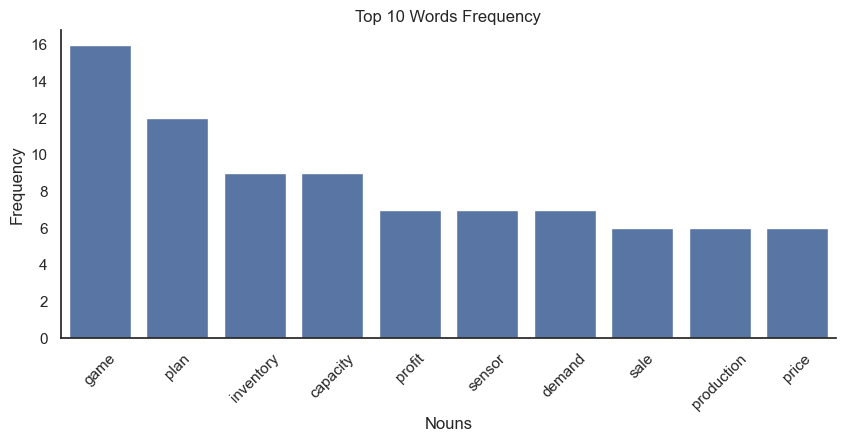

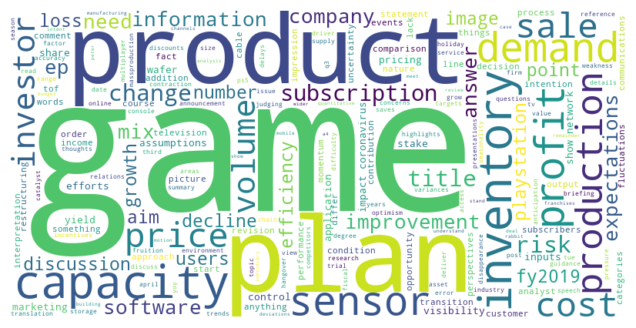


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
18      segment         10
229  statements          9
161    capacity          9
29       change          9
25       fy2020          9


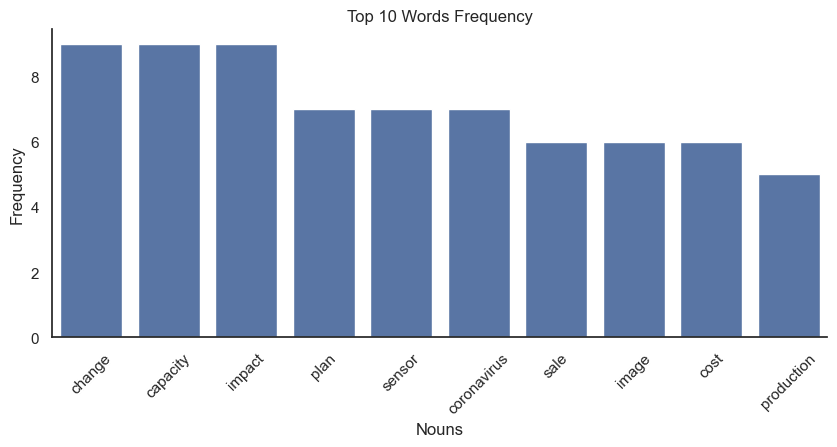

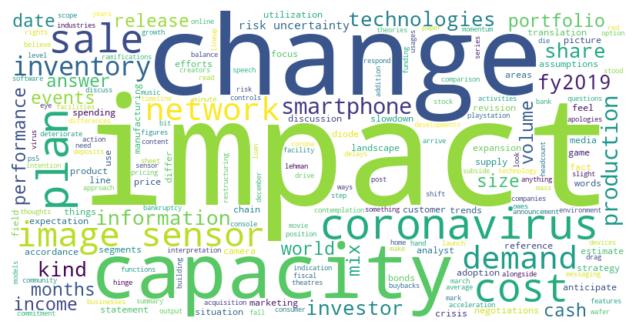


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
14  quarter         19
94      yen         17
21  segment         12
26   demand          9
28   growth          8


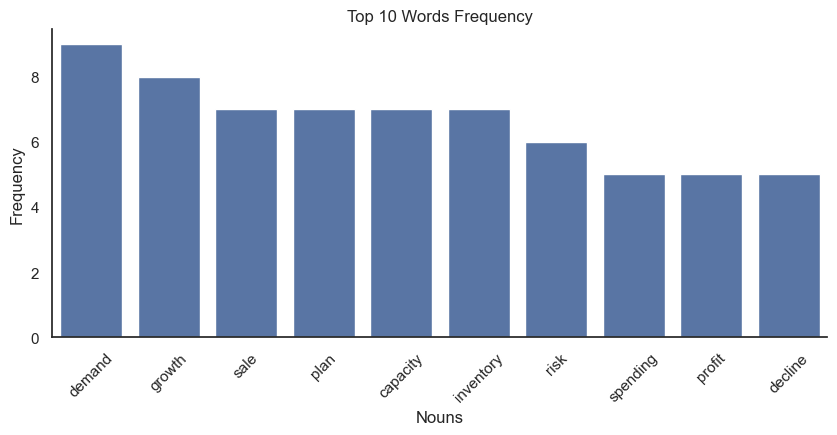

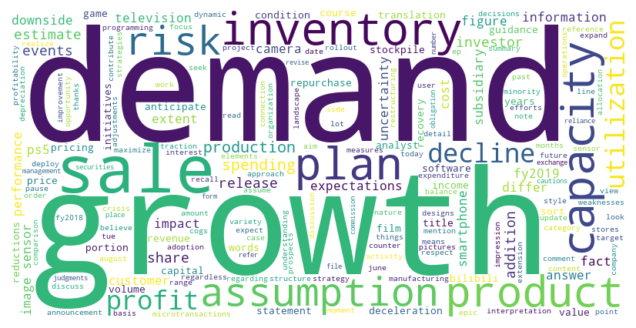


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
18      segment         22
12      quarter         12
262  statements          9
29     customer          9
52     business          8


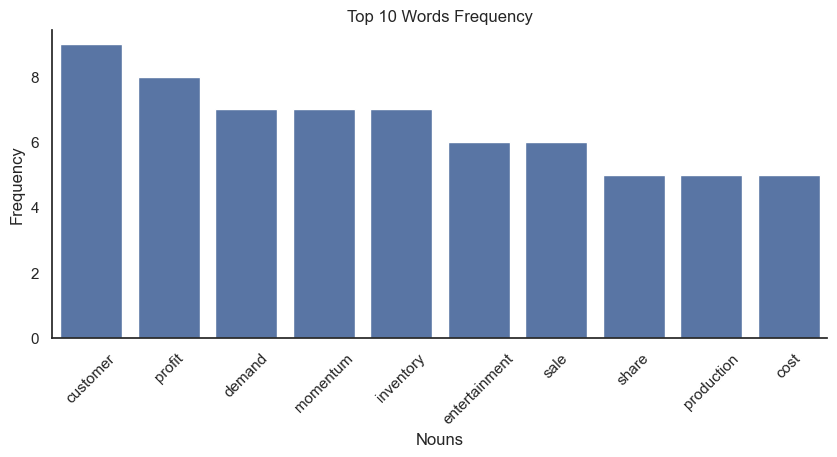

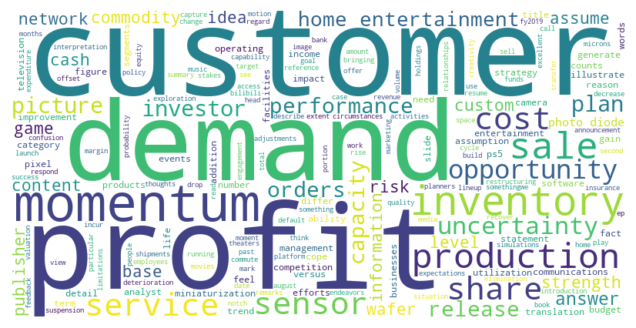


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
18      segment         14
143    business         12
101      margin         10
240  statements          9
75       profit          8


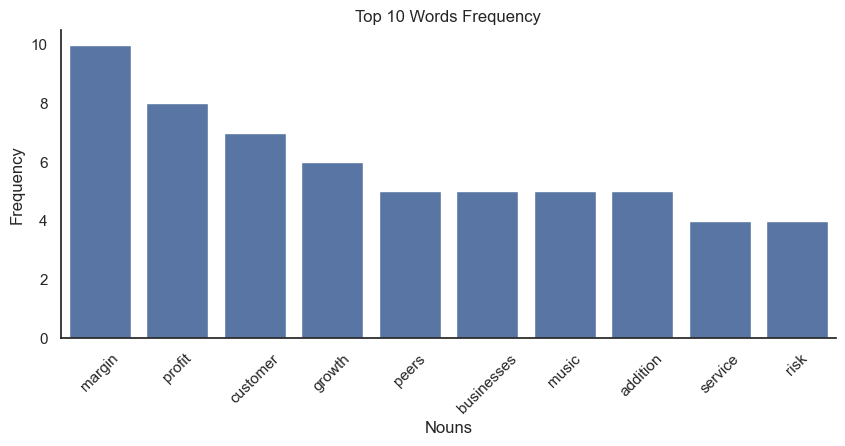

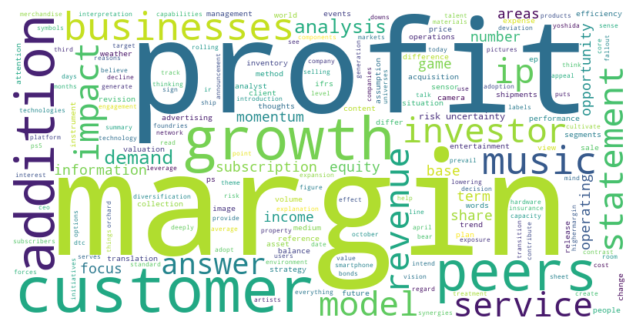


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
19      segment         14
27     capacity         13
101      profit         10
66          yen         10
175  statements          9


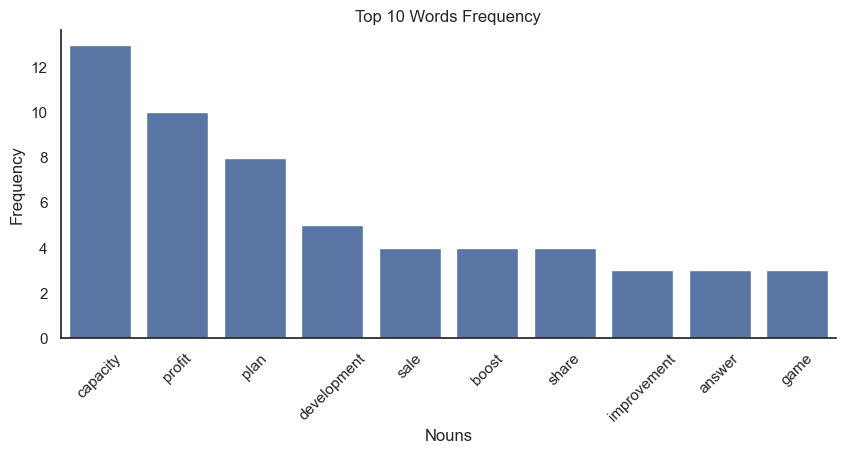

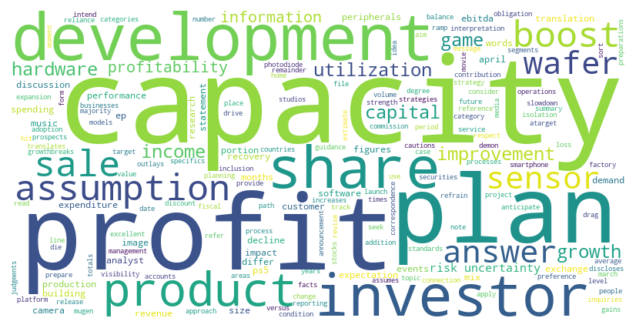


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
13      quarter         17
168  statements          9
20        price          9
28       market          8
18      segment          7


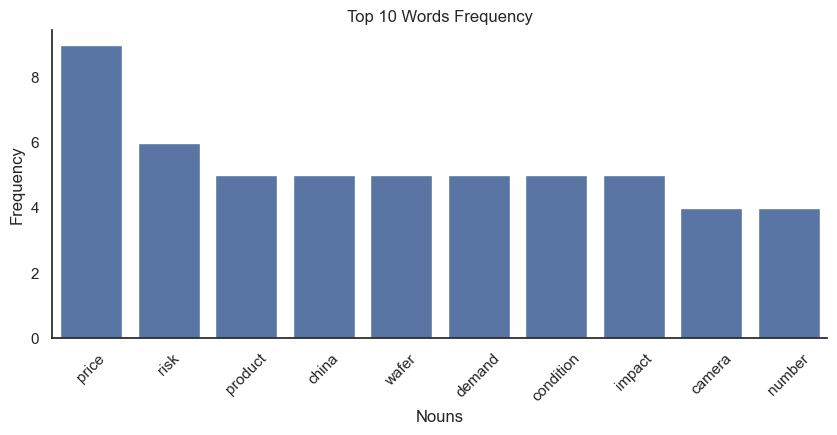

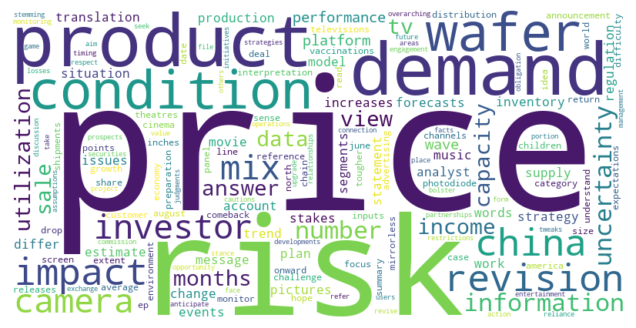


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
            Nouns  Frequency
113   investment         12
13       quarter         12
224   statements          9
20       segment          8
189  application          7


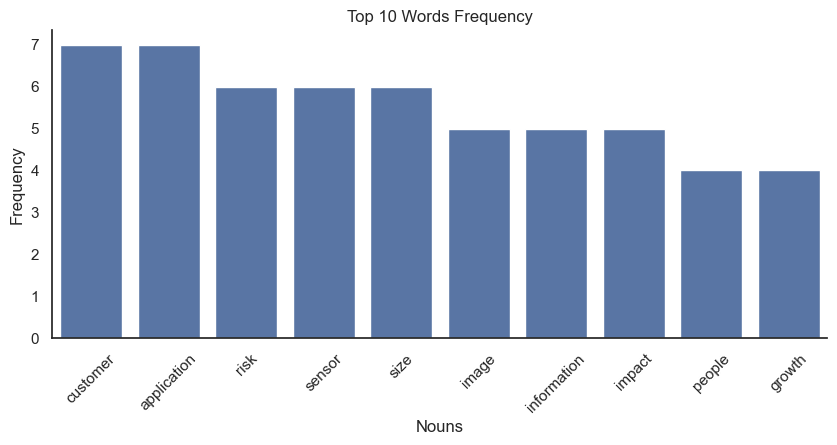

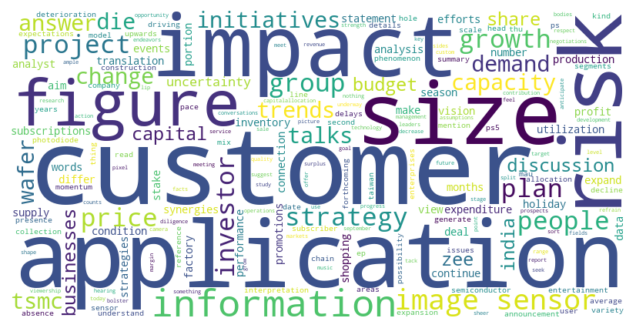


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
105   inventory         11
199      bungie          9
250  statements          9
80         sony          9
68   investment          8


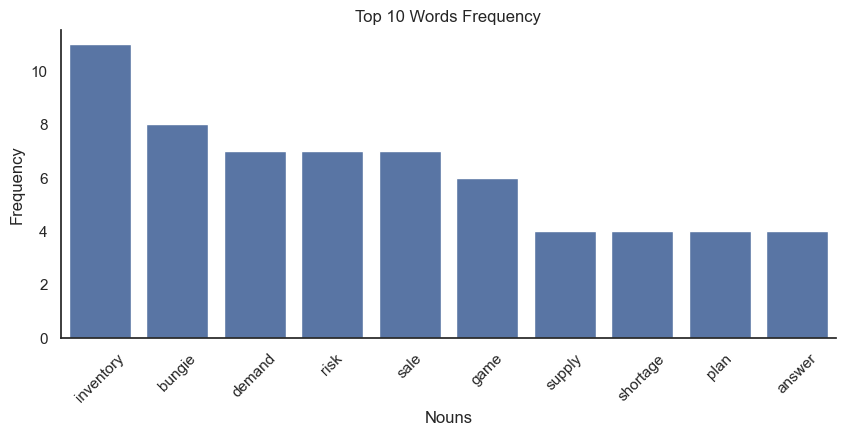

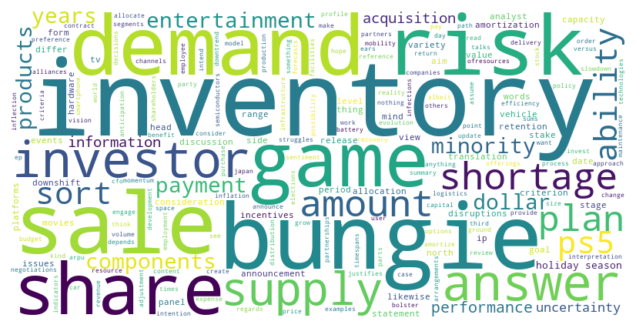


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
20      segment         10
190  statements          9
28       fy2022          9
55    inventory          8
56       levels          7


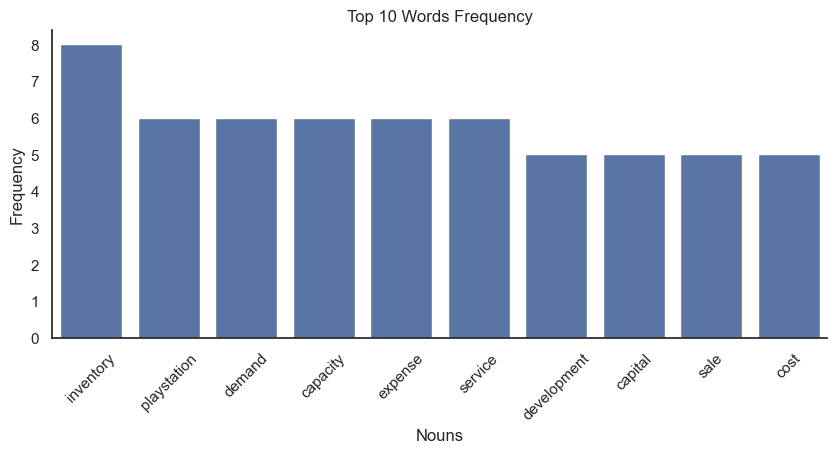

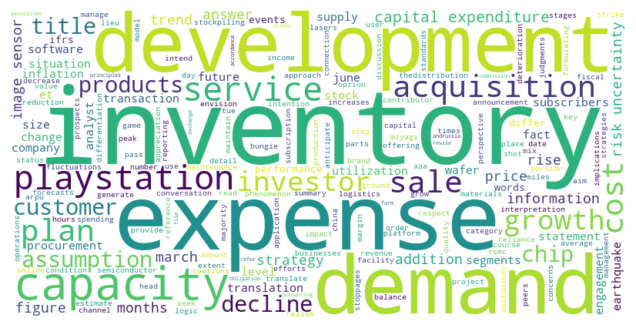


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
45  inventory         19
14    quarter         16
20    segment         13
24       sale         12
49       risk         11


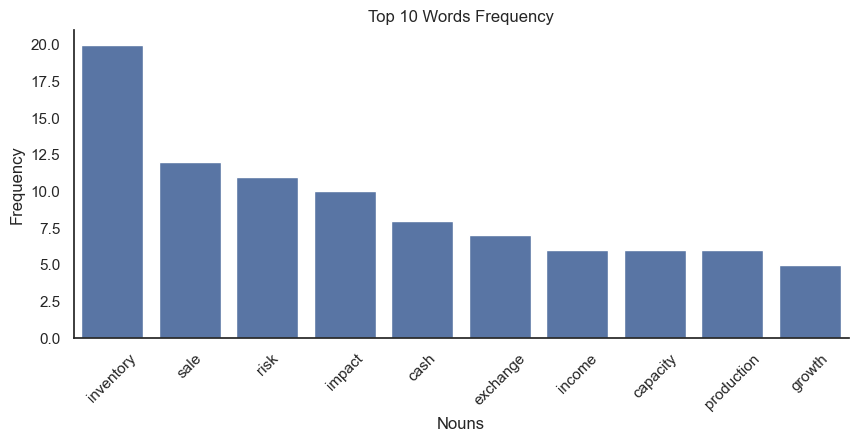

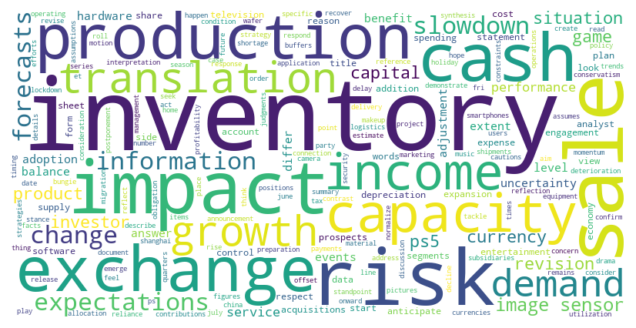


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
13      quarter         12
162  statements          9
18      segment          9
45         plan          7
67        title          7


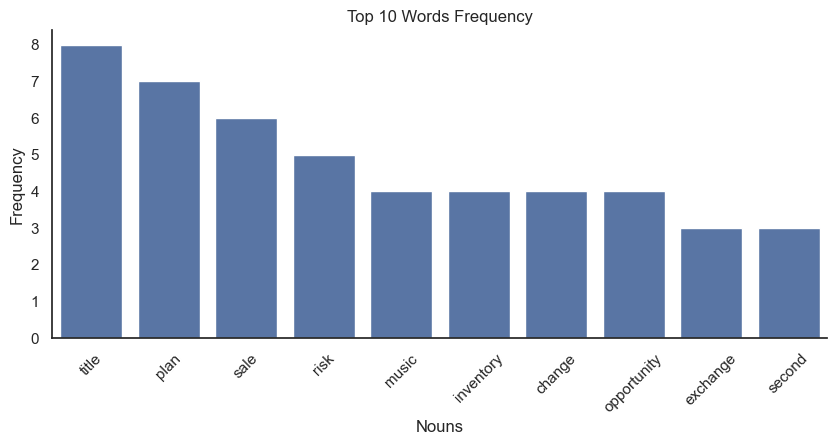

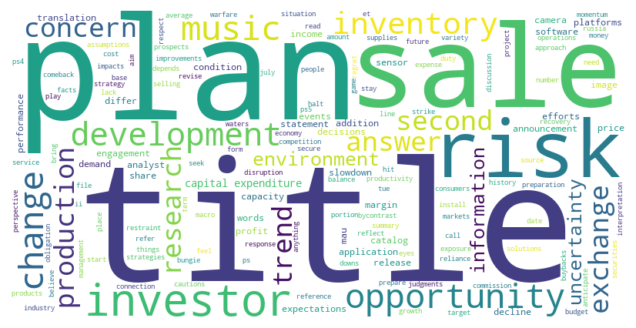


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
13      quarter         12
149  statements          9
20      segment          6
12      results          6
21        units          5


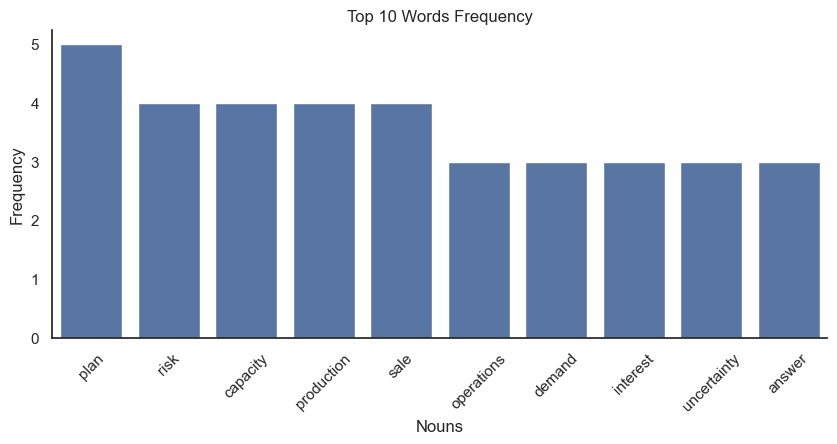

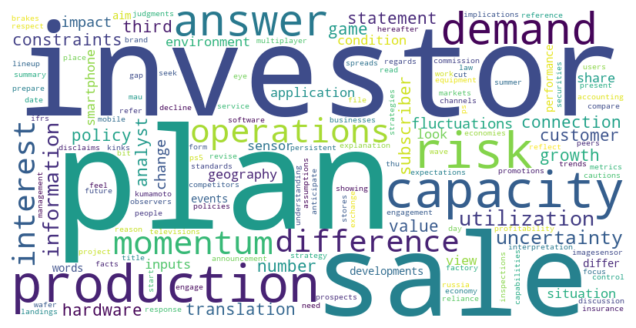


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
54       sale         14
87  inventory         13
45    expense         11
20    segment         11
42     fy2023         10


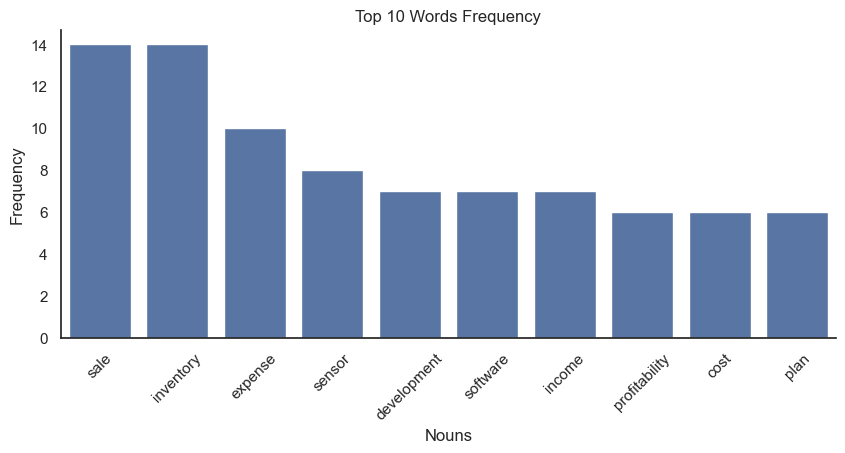

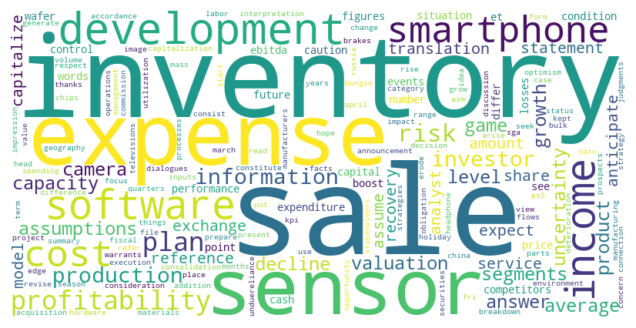


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 23q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
23       sale         22
80  inventory         13
44        yen         11
17    segment         10
10    quarter         10


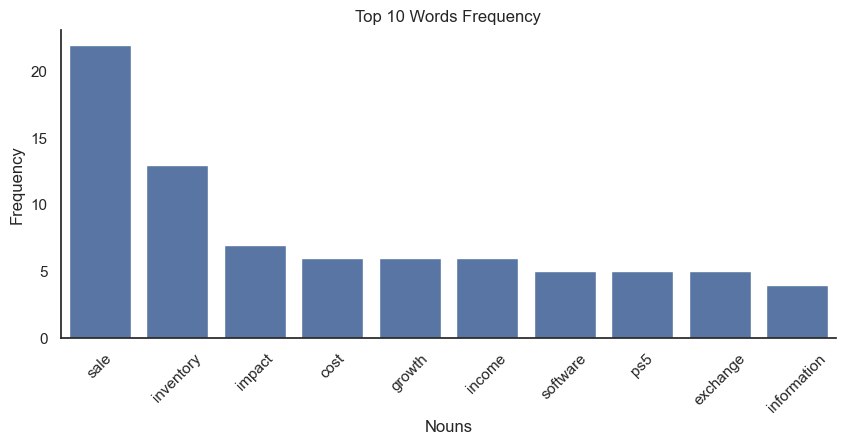

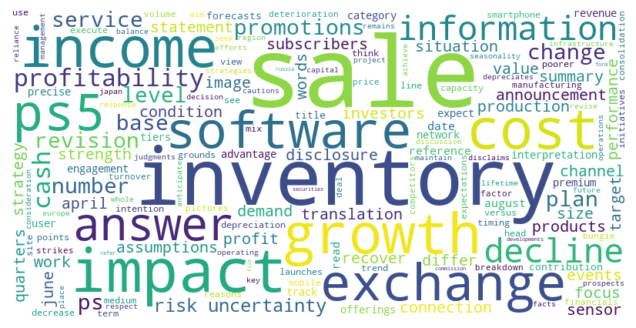


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 23q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
        Nouns  Frequency
18   segment         17
21      year         14
70     title         11
113     sale         11
50    target         10


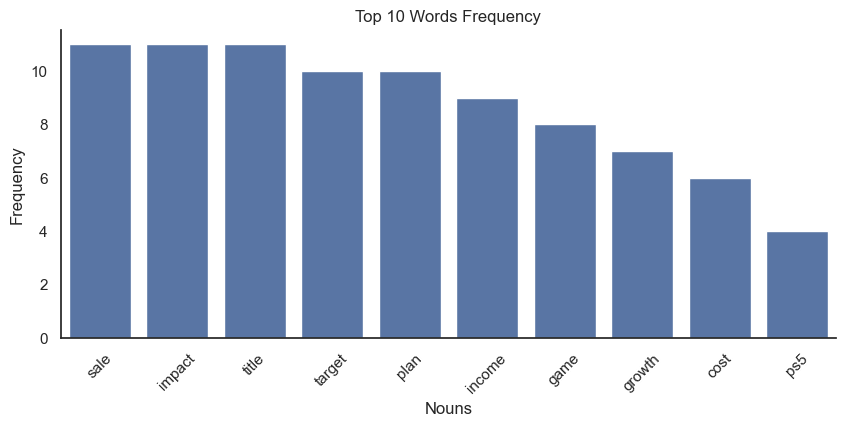

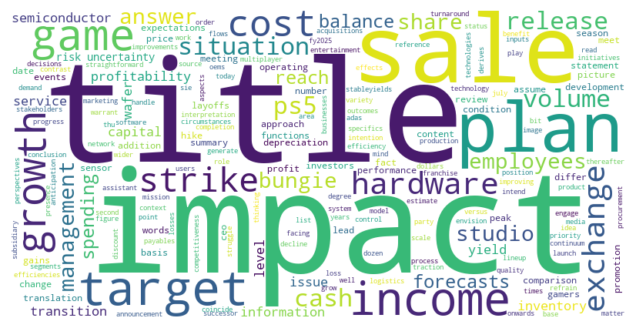

In [26]:
comments_dict = {file_path.name.replace(".pdf",""):tas.pdf_to_text(file_path) for file_path in files_path}
for filename, comment in comments_dict.items():
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ {filename} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    for original, replacement in replacement_mapping.items():  #복수형 단수로 변경
        comment = comment.replace(original, replacement)
        
    tas.set_comments([comment], [])
    print(f"top 5 words before cleaning: \n {tas.df_word_freq.sort_values(by='Frequency', ascending=False).head(5)}")

    tas.set_comments([comment], cleaning_words)
    tas.plot_freq()
    tas.plot_wordcloud()

---
이하 테스트 중

---

In [32]:
for excel_file in excel_files:
    file_name=excel_file.name.split(".")[0]
    output_file_path = output_folder/file_name
    
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■[{file_name}]■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded

    #text 읽기
    comments = [sentence for sentence in df_uploaded["sentences"]]
    tas.get_comments(comments)
    tas.save_df_freq_as_excel(output_file_path, file_name)

    #그래프 만들기
    tas.plot_freq()
    tas.plot_wordcloud()

- colab에서 파일 받기

In [ ]:
!zip -r /content/results_text.zip /content/results_text/
files.download('/content/results_text.zip')

## sentgpt: Fine tune 필요

### GPT setting
- [GPT model info](https://platform.openai.com/docs/models/continuous-model-upgrades)

In [14]:
API_KEY = 
gpt_model="gpt-3.5-turbo-1106"

In [8]:
stm = SentiGPT(api_key=API_KEY, gpt_model=gpt_model)

In [10]:
for excel_file in excel_files:
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded
    
    # GPT 분석
    sentences_list = [sentence for sentence in df_sentences["sentences"]]  # 리스트로 변환
    keywords_list=["brightness", "color", "contrast", "reflection", "viewing angle"]
    analyzed_results_df = stm.analyze_sentences(sentences_list, keywords_list)
    
    # 분석 파일 저장
    file_name=excel_file_path.name.split(".")[0]
    output_file_path = output_folder/file_name
 
    if not output_file_path.exists():
        output_file_path.mkdir(parents=True, exist_ok=True)
    analyzed_results_df.to_csv(output_file_path / f"analyzed_results_{file_name}.csv", index=False, encoding='utf-8')
    
    #그래프 만들기
    # df_analyzed_results = analyzed_results_df - 5  #그래프 범위 조정
    print(f"{file_name}, Plot")
    stm.plot_hist_all(output_folder=output_file_path, file_name=file_name)
    stm.plot_hist_each(output_folder=output_file_path, file_name=file_name)

---